# The Sparks Foundation - GRIP 

Data Science & Business Analytics Intern - May'21 

Task 6: Prediction using Decision Tree Algorithm 

AIM - Create the Decision Tree classifier and visualize it graphically. 

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Author: Vislavath Kumar

# Decision Trees

Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data

We will work with the classic Iris Data Set. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

Full Details: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

C:\Users\Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

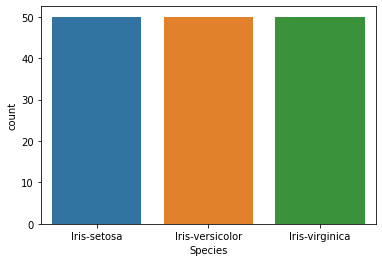

In [7]:
sns.countplot(df['Species'])

here we see that it's actually perfectly balanced

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

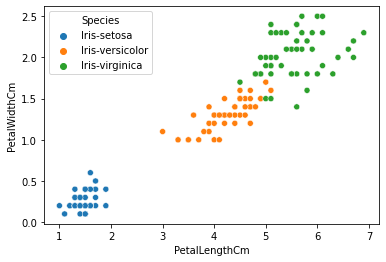

In [9]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=df,hue='Species')

we can do things like a scatterplot to see how separated the classes are. So,we can see that the cetus species, just based off petal length and petal width is actually quite separated, but it looks like versa Color and Virginia tend to be a little more similar.So we're going to have probably some issues on separating out versus color. And Virginia perfectly depending on how luckily we get with our train test split, but cytosine should

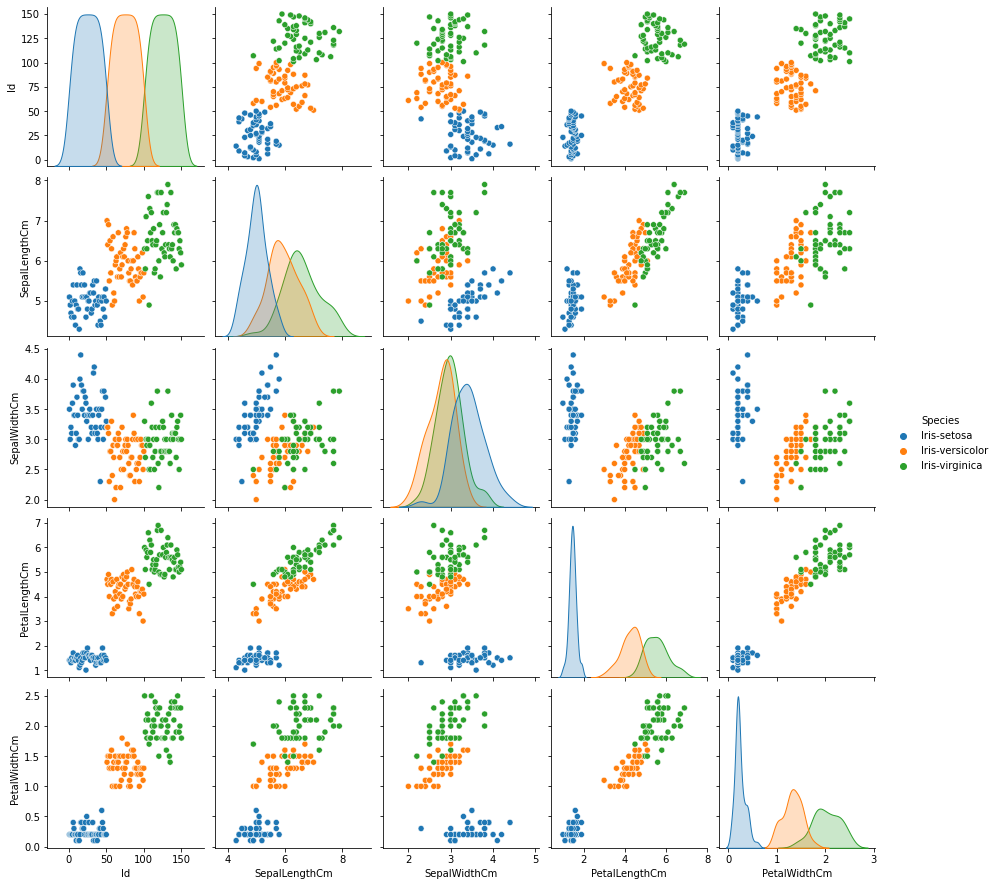

In [10]:
sns.pairplot(df,hue='Species')

we can see that in all of these the status to the blue points are quite separated from the other two and in certain features. First, the color and Virginia are actually quite similar. So you can see based off simple length and simple width, there's a lot of crossover between versa color virginia However, they're a little more separated when it comes to petals, but Cetus is just separated on all those features.

# Feature Engineering

In [11]:
pd.get_dummies(df)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,0,1
146,147,6.3,2.5,5.0,1.9,0,0,1
147,148,6.5,3.0,5.2,2.0,0,0,1
148,149,6.2,3.4,5.4,2.3,0,0,1


In [12]:
pd.get_dummies(df.drop('Species',axis=1),drop_first=True)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


<AxesSubplot:>

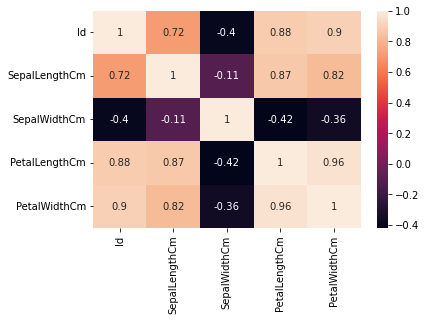

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Train | Test Split

In [15]:
X = df.drop('Species',axis=1)
y = df['Species']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
scaler = StandardScaler()

In [19]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model = DecisionTreeClassifier()

In [22]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
base_pred = model.predict(X_test)

In [24]:
y_test

33         Iris-setosa
16         Iris-setosa
43         Iris-setosa
129     Iris-virginica
50     Iris-versicolor
123     Iris-virginica
68     Iris-versicolor
53     Iris-versicolor
146     Iris-virginica
1          Iris-setosa
147     Iris-virginica
32         Iris-setosa
31         Iris-setosa
122     Iris-virginica
127     Iris-virginica
74     Iris-versicolor
88     Iris-versicolor
96     Iris-versicolor
42         Iris-setosa
134     Iris-virginica
80     Iris-versicolor
48         Iris-setosa
90     Iris-versicolor
65     Iris-versicolor
97     Iris-versicolor
64     Iris-versicolor
93     Iris-versicolor
114     Iris-virginica
25         Iris-setosa
41         Iris-setosa
104     Iris-virginica
89     Iris-versicolor
116     Iris-virginica
82     Iris-versicolor
112     Iris-virginica
55     Iris-versicolor
86     Iris-versicolor
61     Iris-versicolor
94     Iris-versicolor
135     Iris-virginica
21         Iris-setosa
22         Iris-setosa
29         Iris-setosa
77     Iris

In [25]:
base_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

# Evaluation

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [27]:
confusion_matrix(y_test,base_pred)

array([[13,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 12]], dtype=int64)

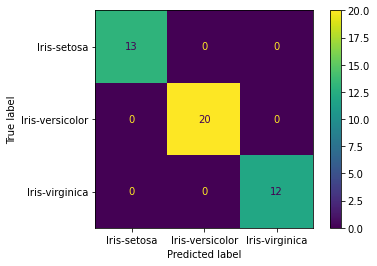

In [28]:
plot_confusion_matrix(model,X_test,y_test)

We will see how many samples you're actually messing up here or getting correct.And we should be getting pretty good performance depending on how we actually ran your decision tree.
We may get something very slightly different than this, but you should see at most probably around is classified correctly from the test set.

In [29]:
print(classification_report(y_test,base_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [30]:
model.feature_importances_

array([0.52419249, 0.        , 0.        , 0.        , 0.47580751])

In [31]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Id,0.524192
SepalLengthCm,0.000000
SepalWidthCm,0.000000
PetalLengthCm,0.000000
PetalWidthCm,0.475808


# Visualize the Tree

In [32]:
from sklearn.tree import plot_tree

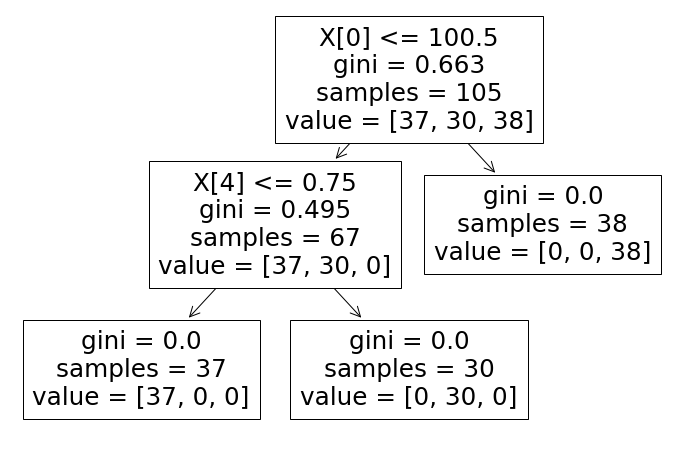

In [33]:
plt.figure(figsize=(12,8))
plot_tree(model);

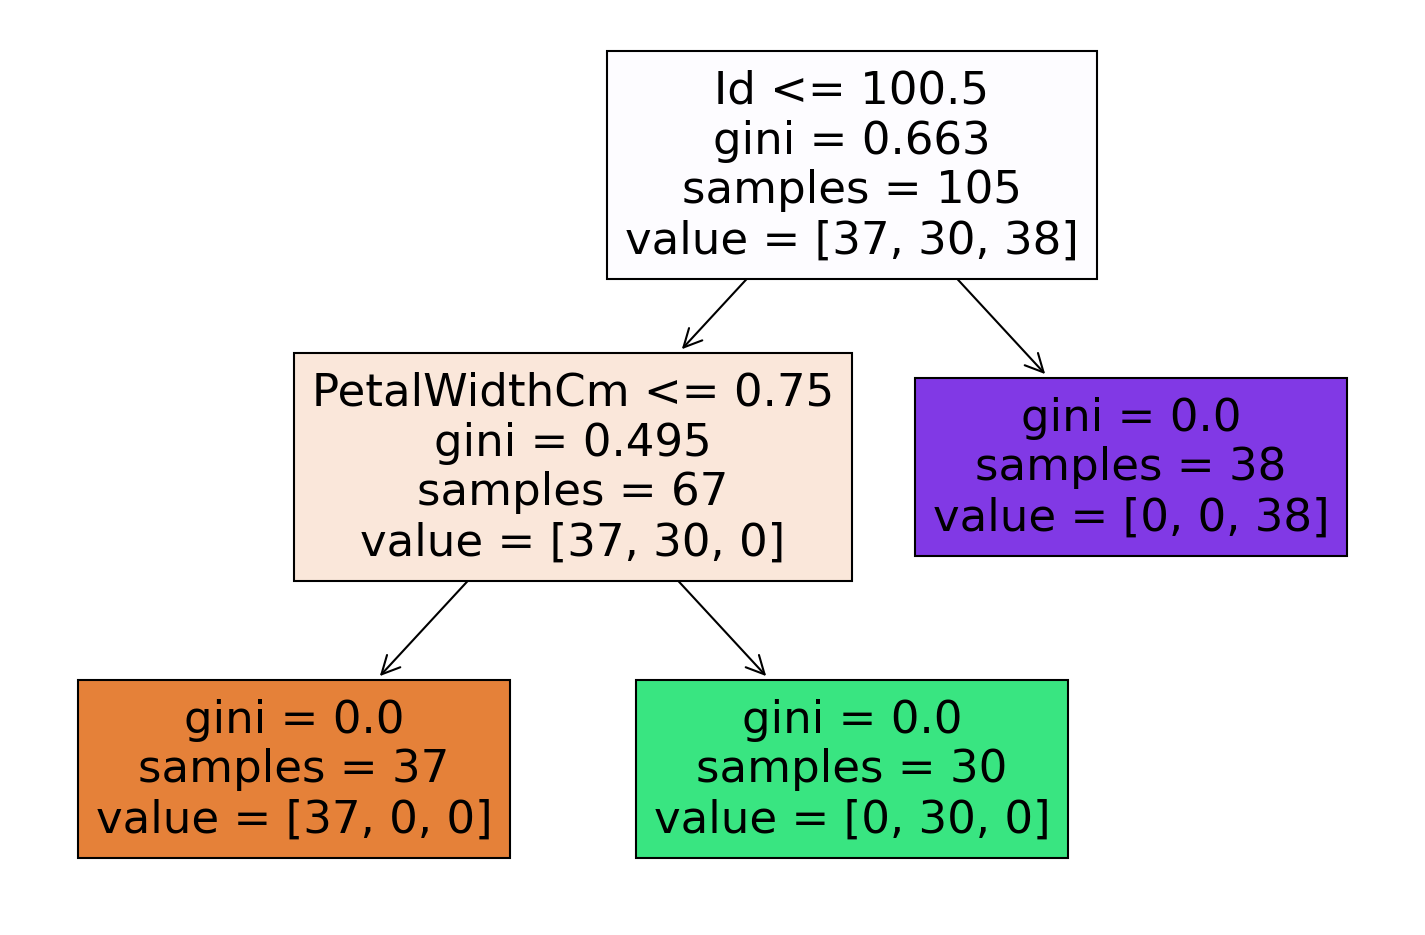

In [34]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

# Reporting Model Results

To begin experimenting with hyperparameters, let's create a function that reports back classification results and plots out the tree.

In [35]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

In [36]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

                 precision    recall  f1-score   support

    Iris-setosa       0.93      1.00      0.96        13
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45





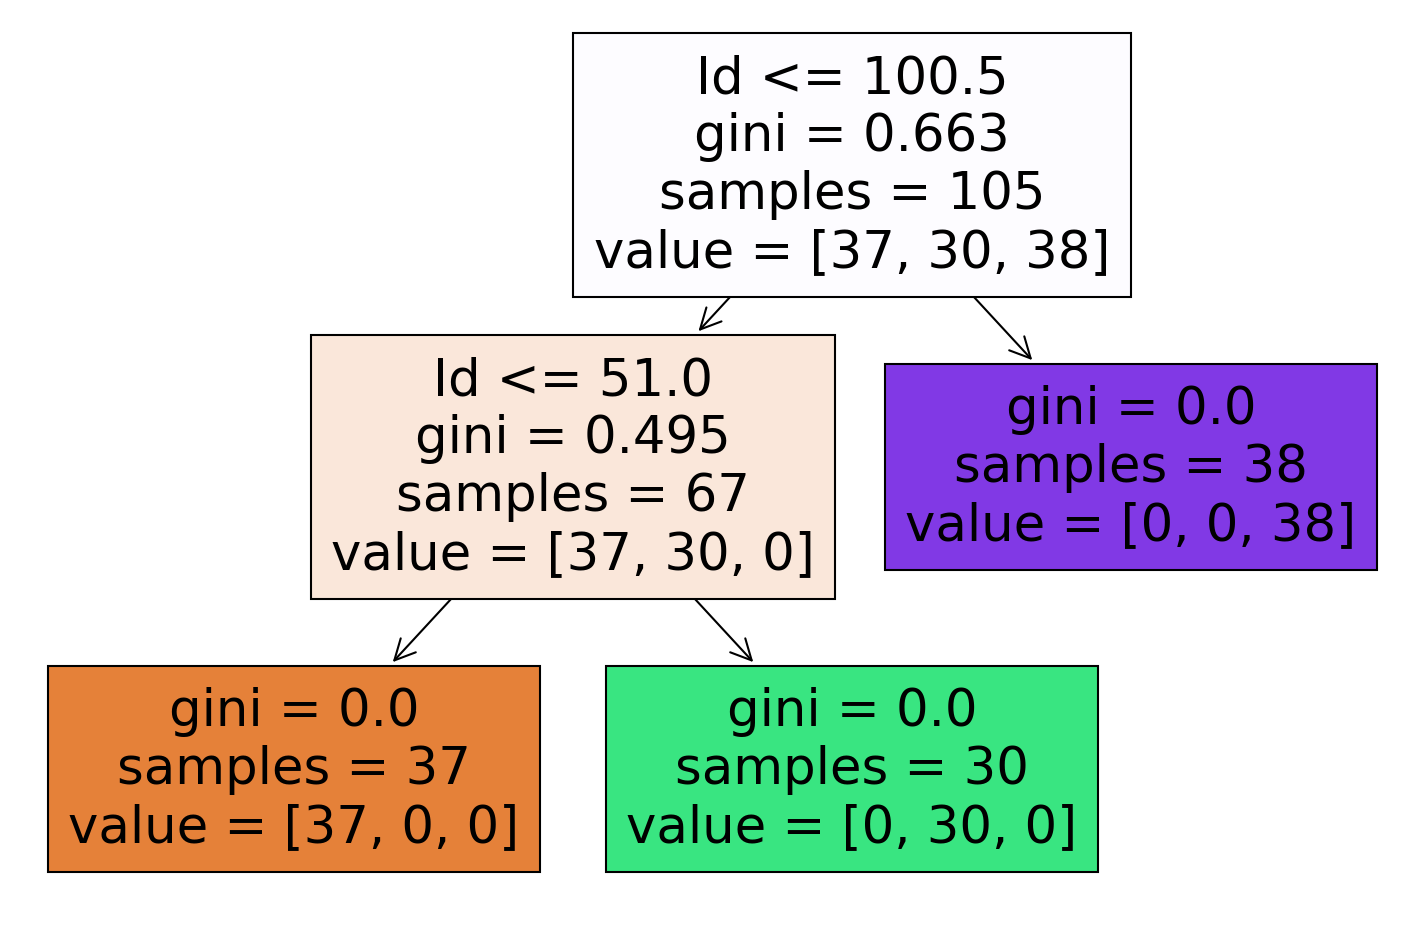

In [37]:
report_model(pruned_tree)

# Max Leaf Nodes

In [38]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45





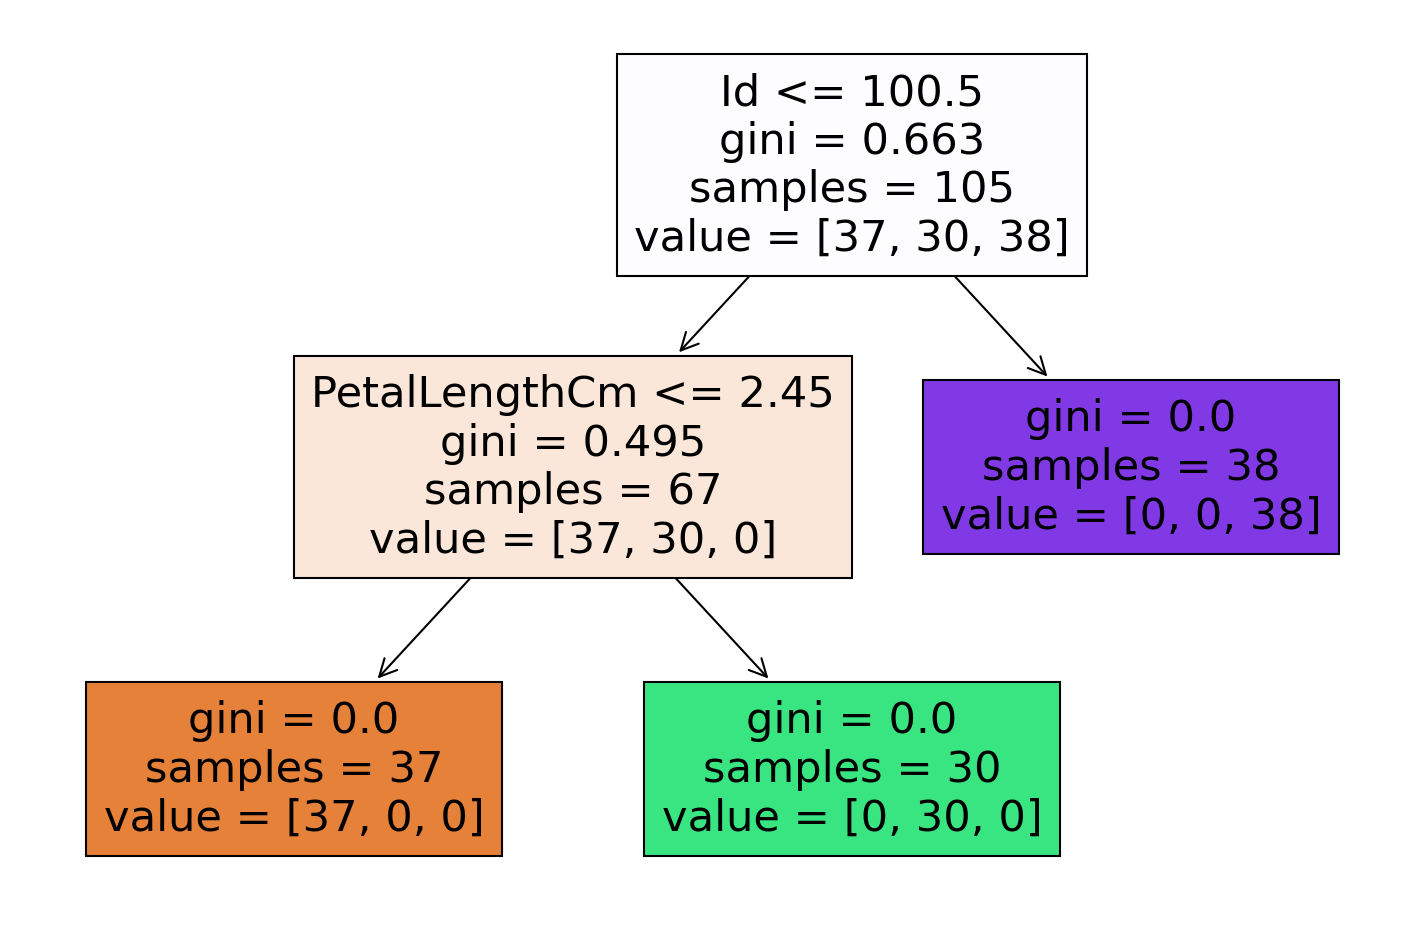

In [39]:
report_model(pruned_tree)

# Criterion

In [40]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45





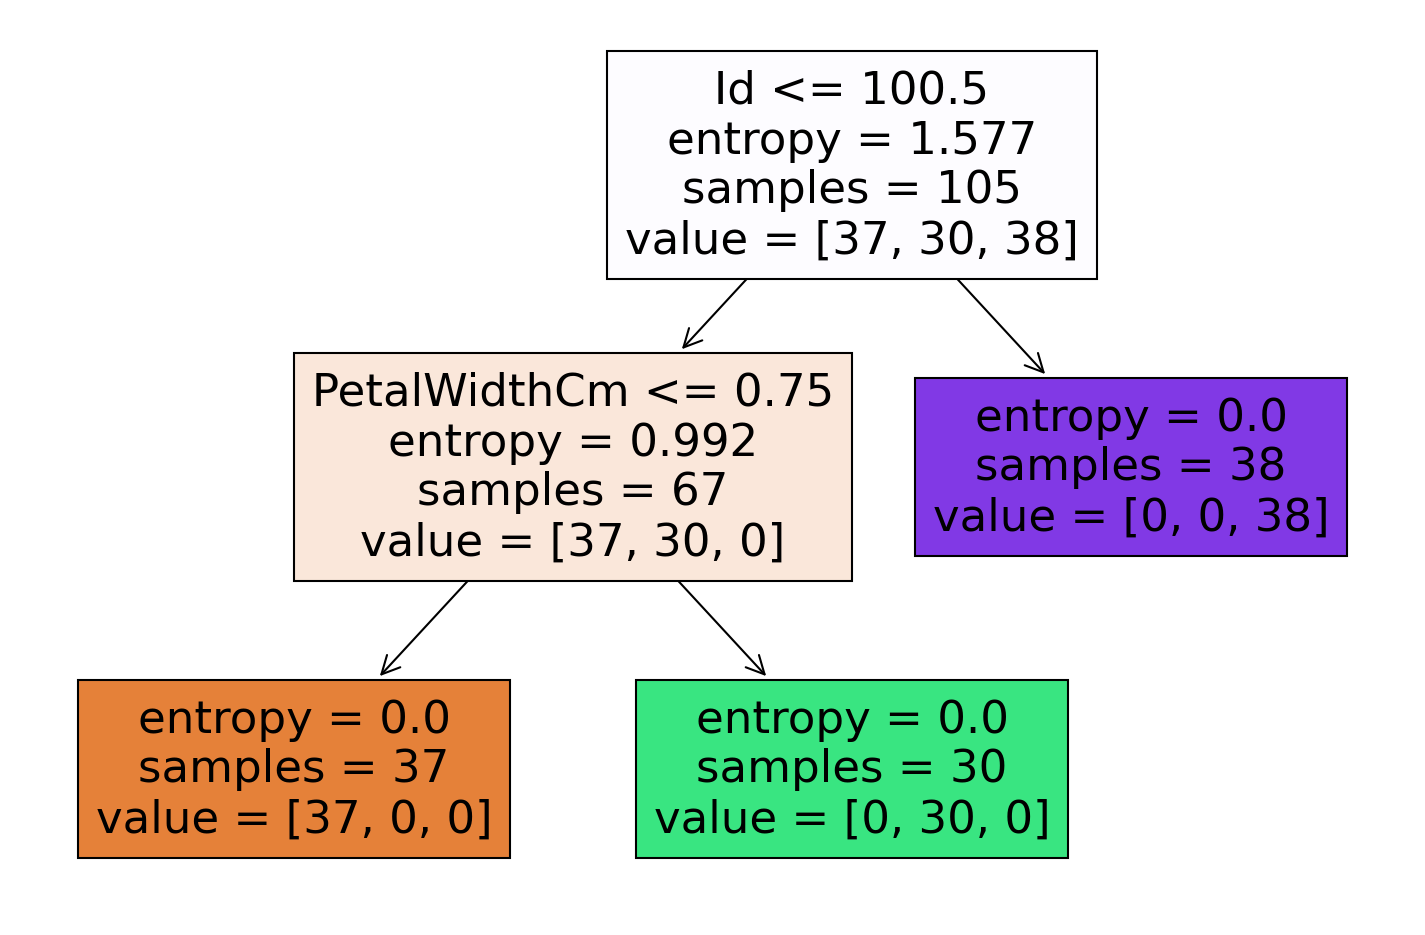

In [41]:
report_model(entropy_tree)

Precision, recall and F1 score are exatly 100% - model is fit and predicted with accuracy.

We can now feed any new/test data to this classifer and it would be able to predict the right class accordingly